Graphics in Python
----

The foundational package for most graphics in Python is `matplotlib`, and the `seaborn` package builds on this to provide more statistical graphing options. We will focus on these two packages, but there are many others if these don't meet your needs.

There are slao several specialized packages that might come in useful:

- `ggplot` is a port of the R `ggplto2` library to Python
- `vispy` and `lightning` for interactive visualisation of large data sets
- `bokeh` for web-friendly interactive graphics
- `pyxley` and `spyre` for R `shiny` fans
and several others.

Matplotlib
----

Matplotlib has a "functional" interface similar to Matlab via the `pyplot` module for simple interactive use, as well as an object-oriented interace that is useful for more complex graphic creations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Styles

In [2]:
plt.style.available

['seaborn-notebook',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-muted',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'bmh',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-deep',
 'seaborn-bright',
 'seaborn-white',
 'presentation',
 'seaborn-ticks',
 'seaborn-poster',
 'grayscale',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-paper']

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

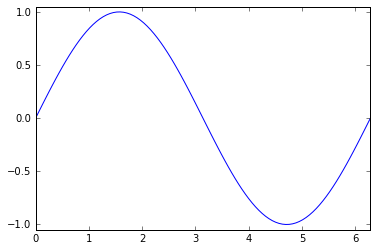

In [4]:
plt.plot(x, y)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
pass

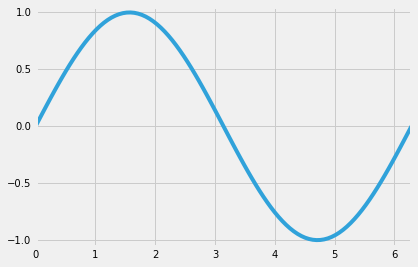

In [5]:
with plt.style.context('fivethirtyeight'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

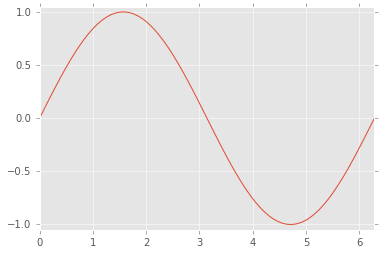

In [6]:
with plt.style.context('ggplot'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

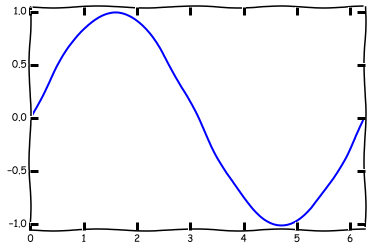

In [7]:
with plt.xkcd():
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Creating your onw style

Many, many options can be configured.

In [8]:
plt.rcParams

RcParams({'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which': 'major',
          'axes.hold': True,
          'a

In [9]:
%%file foo.mplstyle
axes.grid: True
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16

Overwriting foo.mplstyle


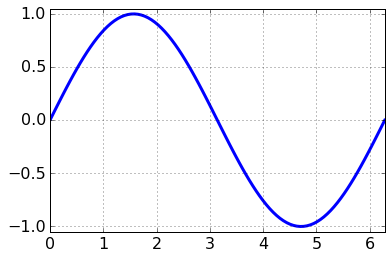

In [10]:
with plt.style.context('foo.mplstyle'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Customizing plots

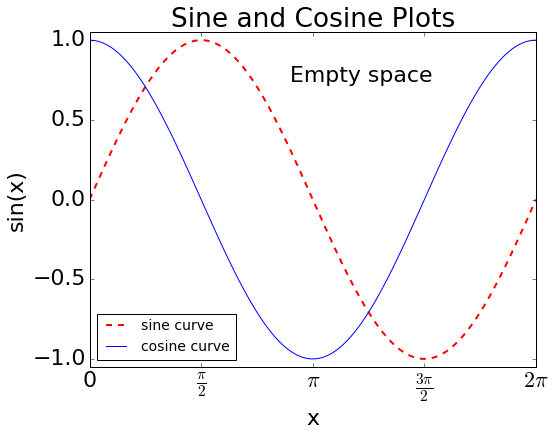

In [11]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
plt.plot(x, y, color='red', linewidth=2, linestyle='dashed', label='sine curve')
plt.plot(x, np.cos(x), 'b-', label='cosine curve')
plt.legend(loc='best', fontsize=14)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xticks([0,0.5*np.pi,np.pi,1.5*np.pi,2*np.pi], 
           [0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.title('Sine and Cosine Plots')
plt.text(0.45, 0.9, 'Empty space', transform=ax.transAxes, ha='left', va='top')
pass

Types of plots
----

In [12]:
plt.style.use('ggplot')

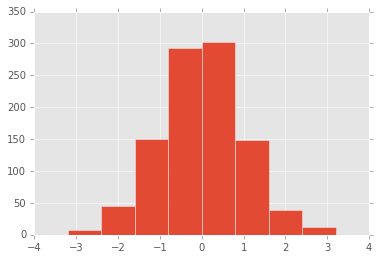

In [13]:
plt.hist(np.random.randn(1000), bins=np.linspace(-4,4,11))
pass

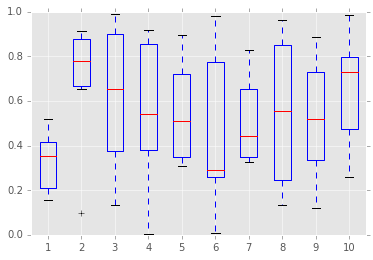

In [14]:
plt.boxplot(np.random.random((6,10)))
pass

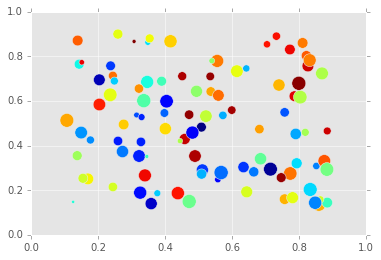

In [15]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100))
pass

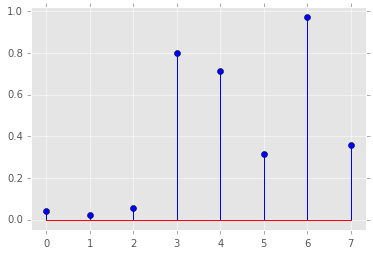

In [16]:
plt.stem(np.random.random(8))
plt.margins(0.05)
pass

Plot layouts
----

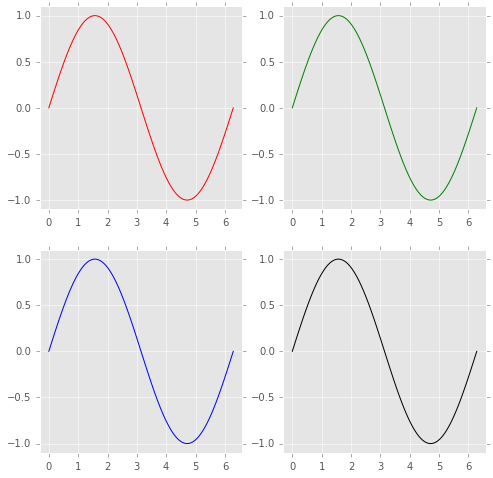

In [17]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0].plot(x,y, 'r')
axes[0,1].plot(x,y, 'g')
axes[1,0].plot(x,y, 'b')
axes[1,1].plot(x,y, 'k')
for ax in axes.ravel():
    ax.margins(0.05)
pass

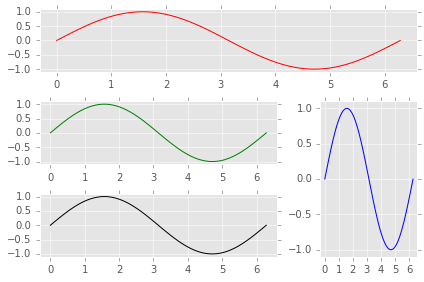

In [18]:
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0), colspan=2)
axes = [ax1, ax2, ax3, ax4]
colors = ['r', 'g', 'b', 'k']
for ax, c in zip(axes, colors):
    ax.plot(x, y, c)
    ax.margins(0.05)
plt.tight_layout()

Seaborn
----

In [25]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    import seaborn as sns

In [28]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [30]:
import numpy.random as rng

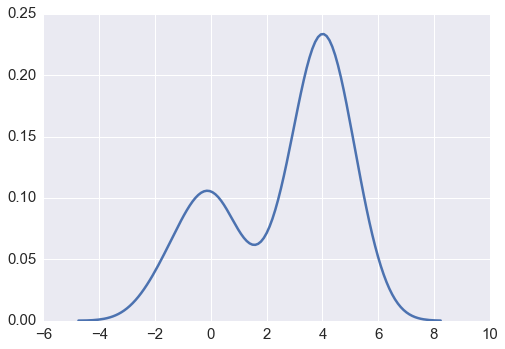

In [31]:
sns.kdeplot(np.r_[rng.normal(0,1,50), rng.normal(4,0.8,100)])
pass